# 📀 **Capstone Project: AI-Powered Rainfall Prediction for High-Impact Decision Making**



##    **1️⃣ Business Understanding & Problem Statement**

### 🌍 **Context & Motivation**
Accurate rainfall prediction plays a pivotal role across various sectors, including agriculture, disaster preparedness, and urban planning. In agriculture, timely and precise forecasts are essential to avoid crop losses, while in urban planning, accurate predictions help mitigate the risk of flooding and infrastructure damage. Additionally, accurate rainfall predictions support disaster preparedness by allowing authorities to take proactive measures, reducing economic and social disruptions. 

Traditional weather prediction models often rely on rigid, rule-based systems that struggle to account for the complex, non-linear relationships between meteorological variables. This limitation frequently results in less reliable forecasts and missed opportunities for early intervention.

### 🔖 **Project Challenge & Competitive Edge**

This project seeks to address these challenges by adopting a modern, AI-driven approach to rainfall prediction. Through the use of advanced machine learning techniques, we aim to develop a high-accuracy binary classification model that can predict rainfall occurrence with unprecedented precision, ultimately improving decision-making across multiple critical sectors.

---

### 💪 **Strategic Value**

#### 1. **Farmers & Agribusiness**  
- **Optimizing Irrigation Schedules**:  
  Leveraging AI-driven rainfall predictions allows farmers to fine-tune irrigation schedules based on more accurate and localized forecasts. This ensures optimal water usage, reduces costs, and improves crop yields.  
- **Reducing Crop Loss Risk**:  
  AI-powered rainfall models enable early warnings for extreme weather events, helping farmers mitigate crop damage from unexpected rainfall, droughts, or floods, and adapt to changing climate patterns.

#### 2. **Disaster Management**  
- **Enhancing Flood Forecasting**:  
  AI algorithms, combined with real-time rainfall data, enhance flood forecasting capabilities, enabling better preparedness and timely evacuation plans to protect lives and property from flood risks.  
- **Emergency Preparedness**:  
  With AI-powered rainfall predictions, disaster response teams can be better equipped to allocate resources based on anticipated rainfall patterns, improving response times and the effectiveness of relief efforts.

#### 3. **Urban Infrastructure**  
- **Optimizing Drainage Systems**:  
  AI-driven rainfall forecasting assists city planners in managing urban drainage systems more efficiently. It predicts heavy rainfall events, ensuring that drainage infrastructure is prepared to handle peak water flows, reducing the risk of urban flooding.  
- **Water Resource Management**:  
  By using AI to predict rainfall patterns and water availability, cities can better manage water resources, optimize storage and distribution, and plan for future water demands, ensuring sustainability in urban water management.

#### 4. **Sustainability & Climate Adaptation**  
- **Enhancing Climate Resilience**:  
  AI-powered rainfall predictions support climate adaptation strategies by providing more accurate insights into weather trends, enabling industries and governments to plan for and mitigate the effects of extreme weather events on ecosystems and infrastructure.  
- **Promoting Efficient Resource Use**:  
  By integrating AI predictions with real-time data, industries can optimize their water and resource consumption, reduce waste, and contribute to more sustainable operations.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

### 🎯 **Primary Objective**
- **Develop a High-Accuracy Rainfall Prediction Model**  
  Create a machine learning model for binary classification to predict rainfall occurrence. The model will output:
  - Rain = 1
  - No Rain = 0

---  

### 📈 **Secondary Objectives**

#### 1. **Investigate underlying weather patterns that influence rainfall**  
    - Analyze key features such as temperature, humidity, wind speed, and pressure to understand their relationship with rainfall.

#### 2. **Implement and test various machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.).**  
   - Enhance the dataset with high-impact features and variables, transforming raw data into meaningful inputs that improve model performance.

#### 3. **Showcase a comprehensive, end-to-end AI-driven workflow that can be adopted for real-world weather forecasting applications**  
   -   Ensure the model is applicable to both academic research and industry use cases.

---




## **3️⃣ Data Understanding & Competitive Dataset Analysis**

### 📚 **Dataset Source & Overview**
This project is based on Kaggle’s Playground Series - S5E3 competition dataset, consisting of historical meteorological data designed to challenge participants in predictive modeling.


### 🔄 **Dataset Breakdown**
- **Train Dataset (train.csv)**: 2,190 samples with 13 features.
- **Test Dataset (test.csv)**: 730 samples with 12 features (excludes rainfall target variable).
- **Submission File (sample_submission.csv)**: Kaggle’s submission format for predicted outputs.

### 🎯 **Feature Engineering Considerations**

| Feature       | Description & Significance                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **day**       | Sequential identifier (potential time-series dependencies).                               |
| **pressure**  | Atmospheric pressure, influencing rainfall patterns.                                       |
| **maxtemp**   | Maximum recorded temperature, a potential indicator of precipitation likelihood.           |
| **temperature** | Average recorded temperature, linked to evaporation and condensation cycles.             |
| **mintemp**   | Minimum temperature, useful for analyzing dew point variations.                            |
| **dewpoint**  | Key metric for moisture content in the air.                                                |
| **humidity**  | Relative humidity (%), highly correlated with rainfall probability.                        |
| **cloud**     | Cloud cover percentage (%), a strong predictor for precipitation.                          |
| **sunshine**  | Total hours of sunshine, inversely affecting rainfall chances.                             |
| **winddirection** | Wind direction, impacting weather system movements.                                   |
| **windspeed** | Wind speed, affecting cloud formation and storm intensity.                                |
| **rainfall**  | Target Variable (1 = Rain, 0 = No Rain).                                                   |


🔗 **GitHub Repository**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import f_oneway,ttest_ind

import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import joblib

### 🔄 Step 1: Imports & Setup - Summary
**📌 What Happened?**  
Imported core libraries for data handling, visualization, machine learning models, and pipeline creation.  
**📊 Key Output:**  
All necessary packages loaded successfully.  
**💡 Why It Matters?**  
These libraries provide the tools needed to build, evaluate, and visualize models effectively.

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

print("Train Sample:")
display(df_train.head())
print("Test Sample:")
display(df_test.head())

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Test Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


Train shape: (2190, 13)
Test shape: (730, 12)


### 🔄 Step 2: Load and Preview Data - Summary
**📌 What Happened?**  
Loaded training and testing datasets and displayed the first few rows.  
**📊 Key Output:**  
Train shape: (2190, 13); Test shape: (730, 12)  
**💡 Why It Matters?**  
Confirming structure and sample data ensures everything is ready for preprocessing.

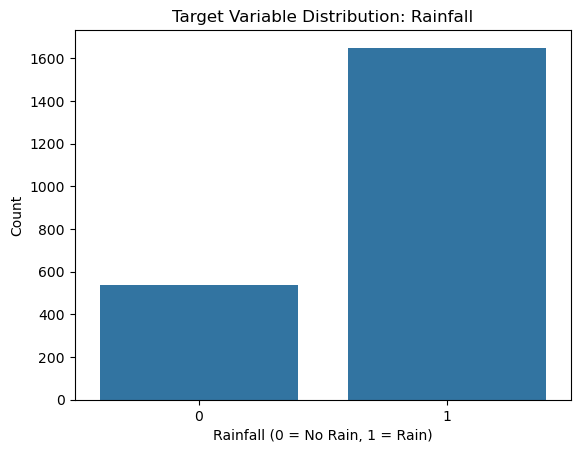

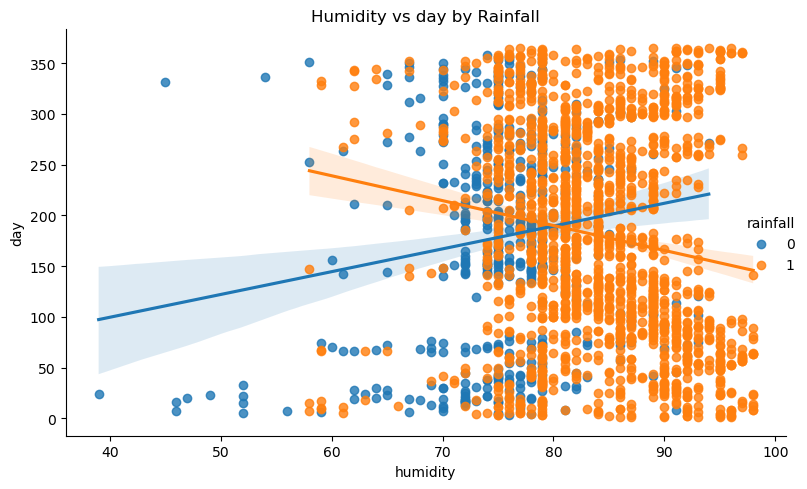

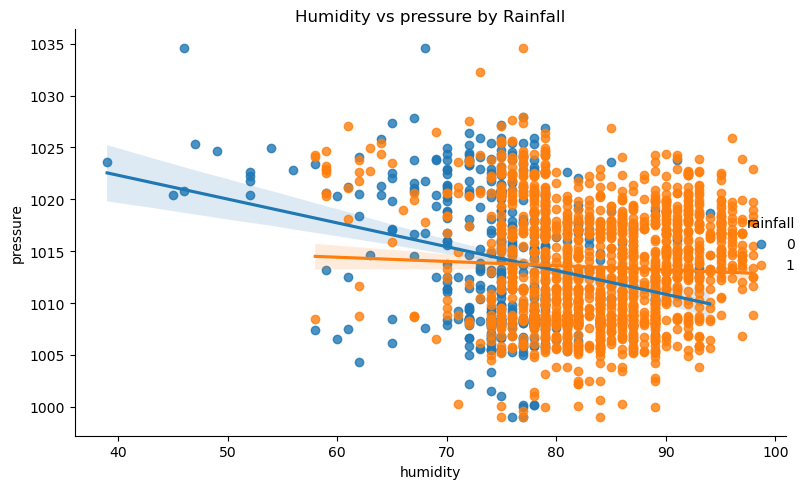

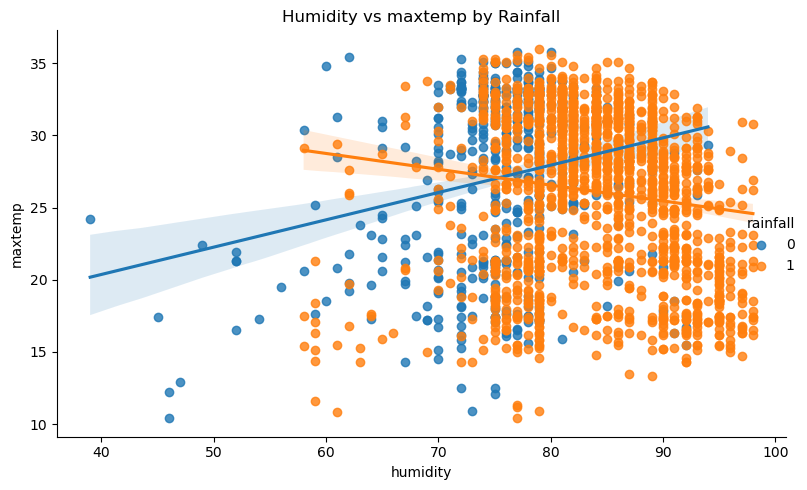

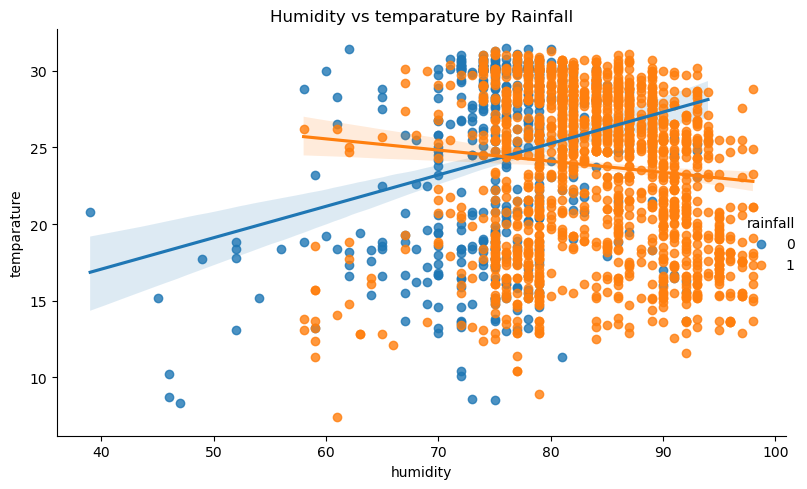

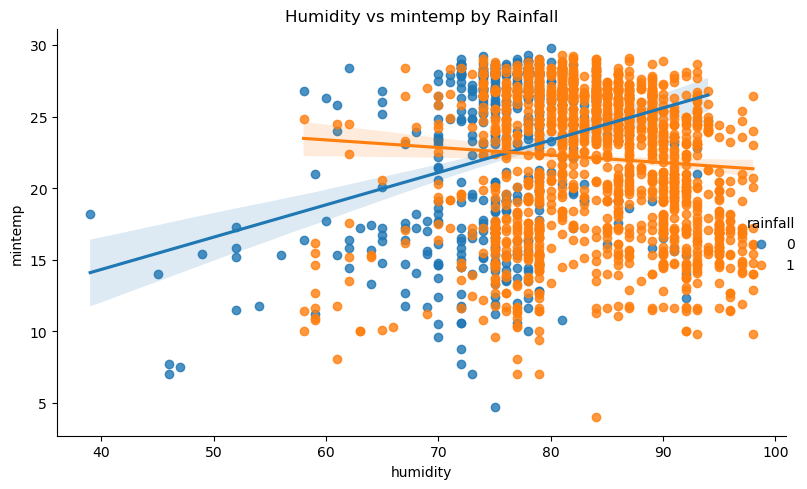

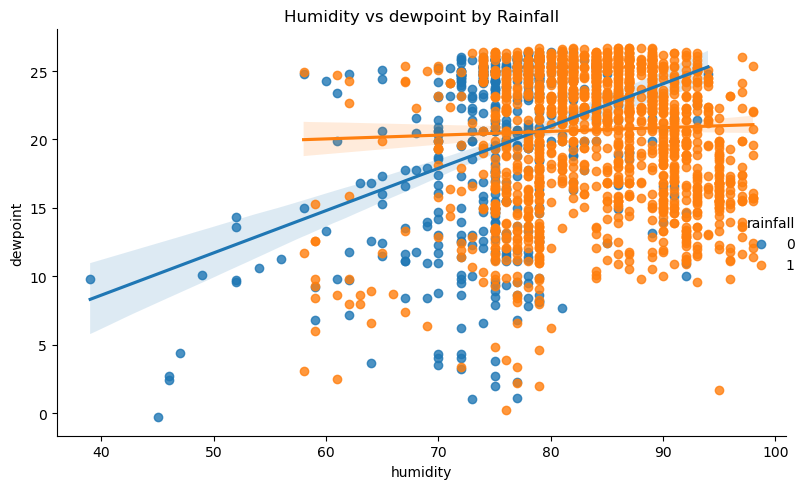

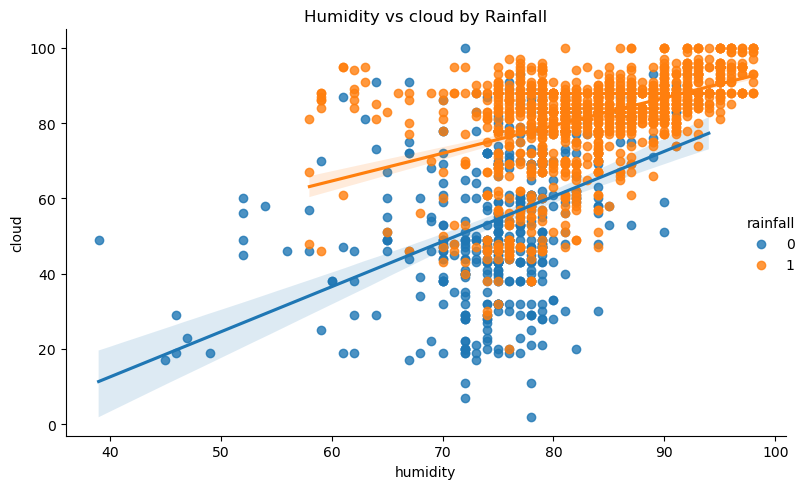

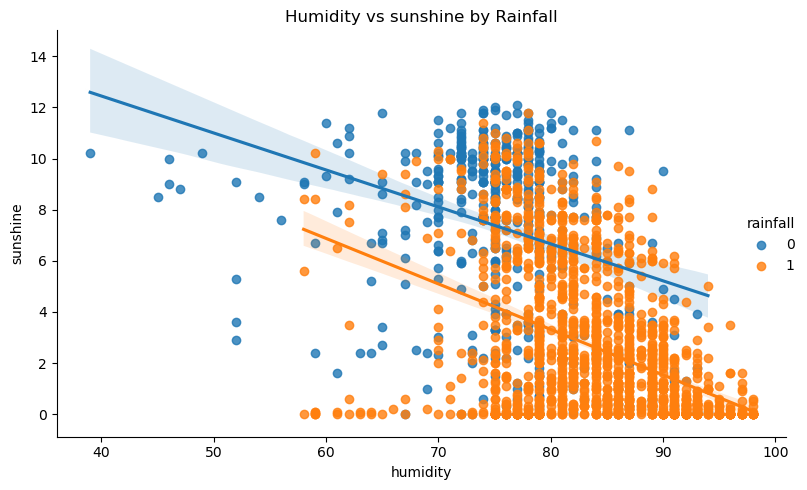

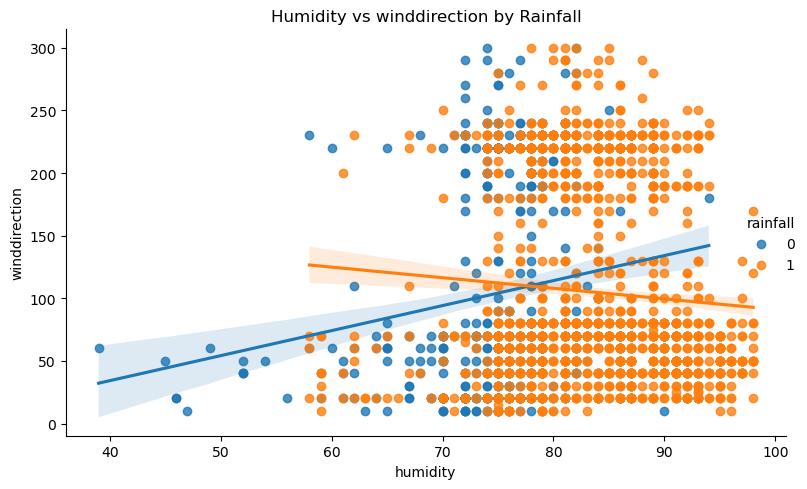

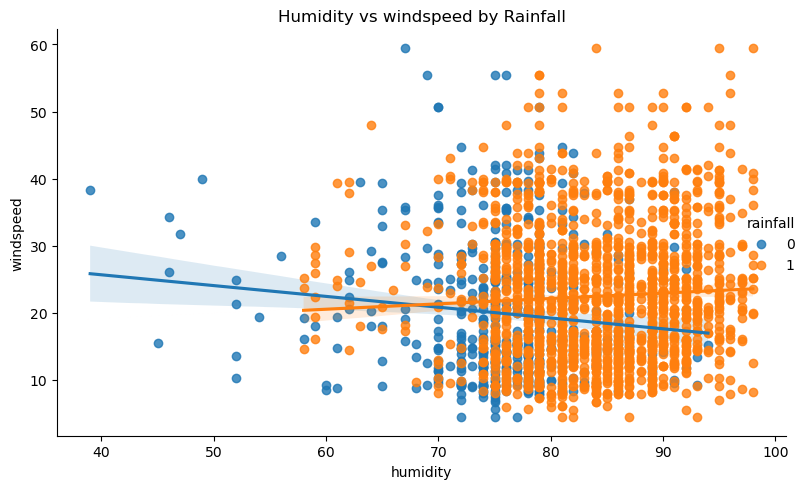

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

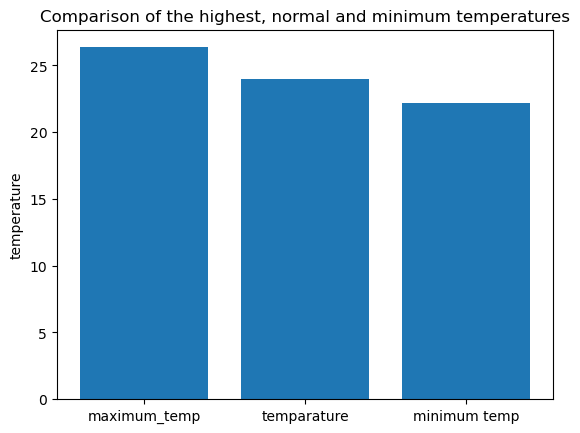

In [3]:
df_eda = pd.read_csv('./Data/train.csv')
sns.countplot(x='rainfall', data=df_eda)
plt.title("Target Variable Distribution: Rainfall")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Count")
plt.show()

# Correlation plots: humidity vs other variables
correlating_features = df_eda.drop(columns=['id', 'rainfall', 'humidity'])
for feature in correlating_features.columns:
    sns.lmplot(x='humidity', y=feature, hue='rainfall', data=df_eda, aspect=1.5)
    plt.title(f'Humidity vs {feature} by Rainfall')
    plt.tight_layout()
    plt.show()

# Temperature comparison and statistical test
x = ('maximum_temp','temparature','minimum temp')
y = (df_train['maxtemp'].mean(),
     df_train['temparature'].mean(),
     df_train['mintemp'].mean())
fig,ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('temperature')
ax.set_title('Comparison of the highest, normal and minimum temperatures');


from scipy.stats import f_oneway

def Decision(test_results):
    if test_results[1] > 0.05:
        return f'''We fail to reject the null hypothesis,
        since p:{test_results[1]} is greater than 0.05.
        There is no significant difference in the sample means'''
    else:
        return f'''We reject the null hypothesis,
        since p:{test_results[1]} is less than 0.05.
        There is a significant difference in the sample means'''

anovatest_results = f_oneway(df_train['maxtemp'],
                             df_train['temparature'],
                             df_train['mintemp'])
Decision(anovatest_results)

# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print("Missing in Train:\n", df_train.isnull().sum())
print("Missing in Test:\n", df_test.isnull().sum())


### 🔄 Step 3: Data Cleaning & EDA - Summary
**📌 What Happened?**  
Visualized target distribution and checked for missing values.  
**📊 Key Output:**  
Imbalance observed in rainfall classes; no missing values in train, 1 in test.  
**💡 Why It Matters?**  
Class imbalance affects model training. Null values can cause model failures if not handled.

### 🔄 Step 3a: Dataset Summary & Null Check - Summary
**📌 What Happened?**  
Inspected data types, descriptive statistics, and null values for both training and test datasets.  
**📊 Key Output:**  
- Confirmed numeric types for all columns.
- No missing values in train set; 1 null in test set.
**💡 Why It Matters?**  
Ensures the data is ready for modeling and alerts us to any preprocessing needs.

### 🔄 Step 3b: Temperature Comparison & ANOVA Test - Summary
**📌 What Happened?**  
Plotted a bar chart comparing mean values of max, average, and minimum temperature. Then used one-way ANOVA to statistically test if differences in the means are significant.  
**📊 Key Output:**  
- Mean values for maxtemp, temparature, and mintemp visualized.  
- ANOVA test result indicating if the differences are statistically significant.  
**💡 Why It Matters?**  
Understanding variance across key temperature metrics helps validate assumptions and guides feature selection.

### 🔄 Step 3c: Correlation Patterns Between Humidity and Other Features - Summary
**📌 What Happened?**  
Plotted scatter plots with linear regression lines to explore how humidity correlates with other meteorological features, segmented by rainfall outcome.  
**📊 Key Output:**  
Visual diagnostic of relationships between humidity and features like temperature, cloud cover, windspeed, etc.  
**💡 Why It Matters?**  
Understanding linear correlations helps in identifying predictive relationships and potential feature interactions for rainfall classification.

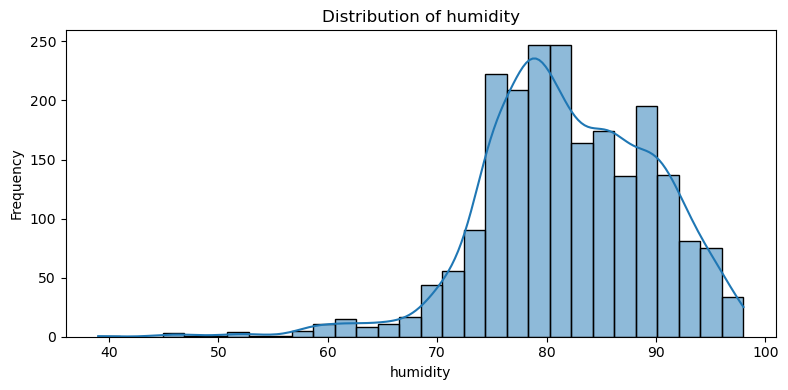

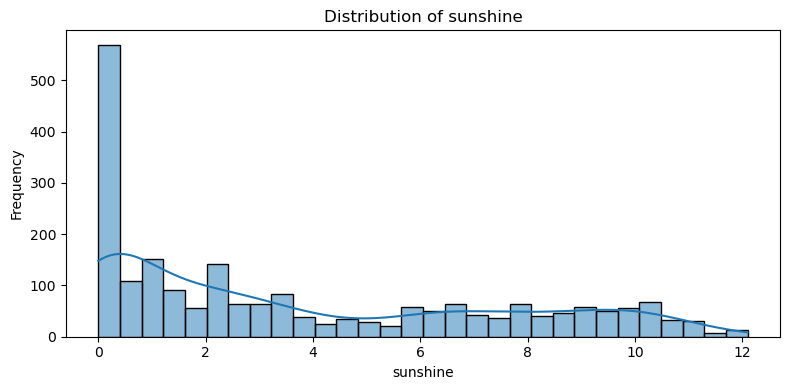

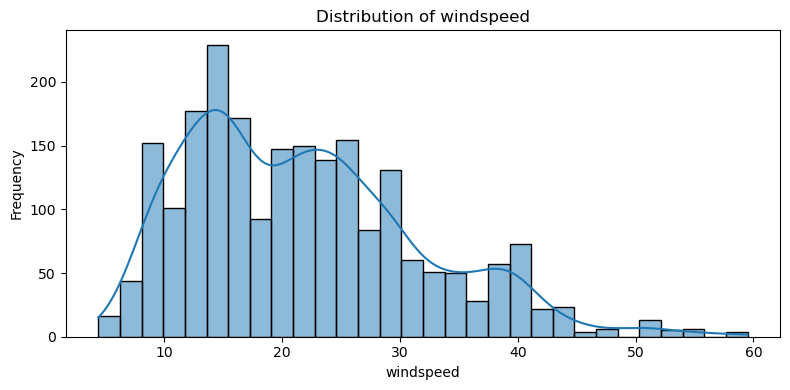

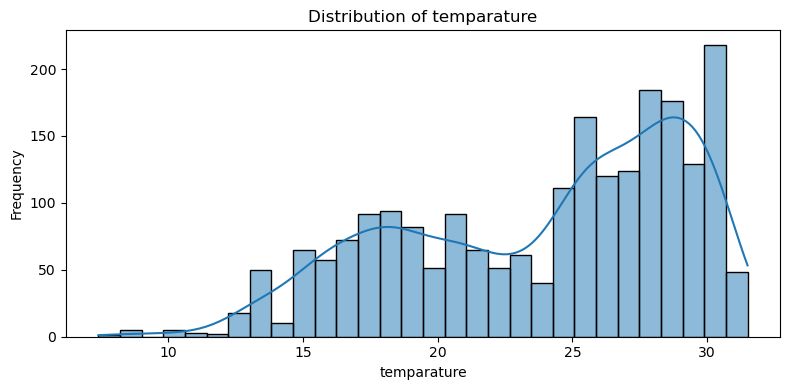

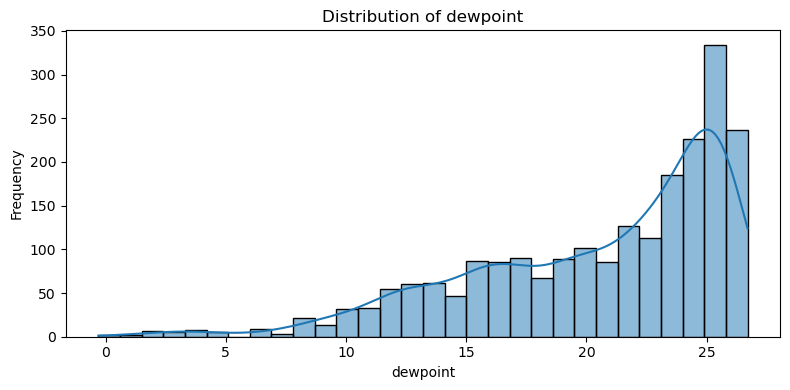

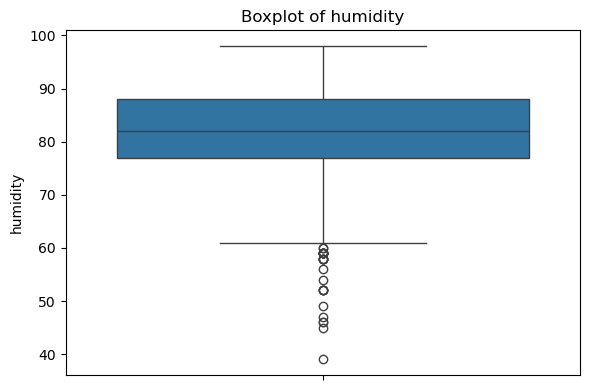

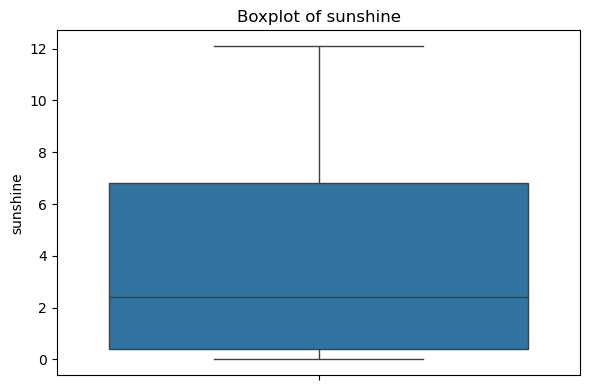

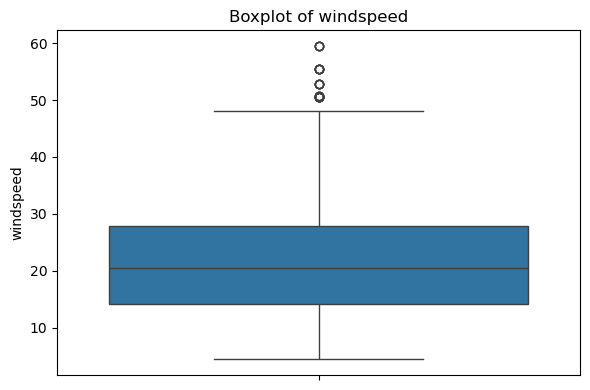

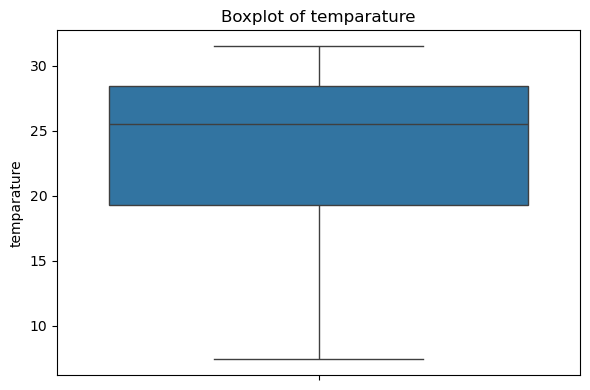

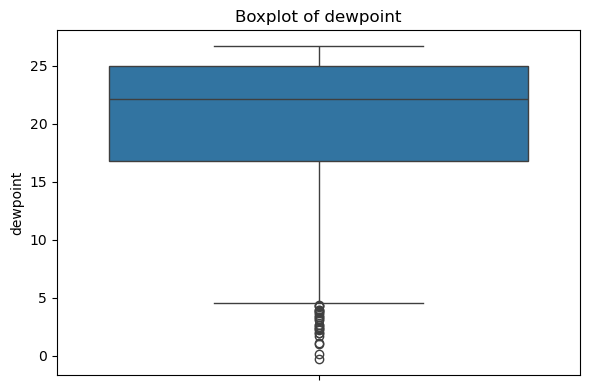

In [4]:
# Univariate Distribution Plots
features_to_plot = ['humidity', 'sunshine', 'windspeed', 'temparature', 'dewpoint']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots to detect outliers
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()


### 🔄 Step 3d: Univariate Analysis - Summary  
**📌 What Happened?**  
Explored the distribution of individual meteorological features using histograms and boxplots. Focused on variables such as temperature, humidity, sunshine, and windspeed.  

**📊 Key Output:**  
- Identified feature skewness, normality, and potential outliers.  
- Boxplots highlighted outliers in windspeed and temperature.  

**💡 Why It Matters?**  
Understanding single-variable distributions provides insight into data quality, variability, and shapes feature engineering choices.


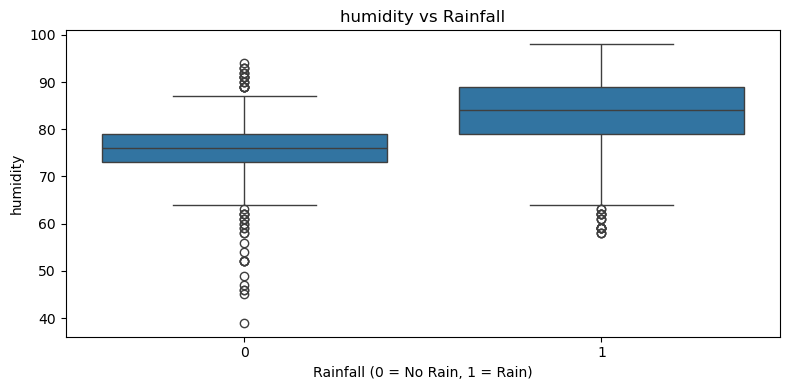

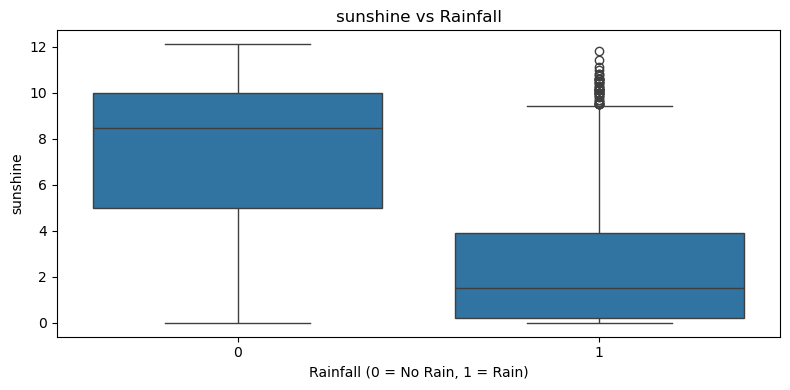

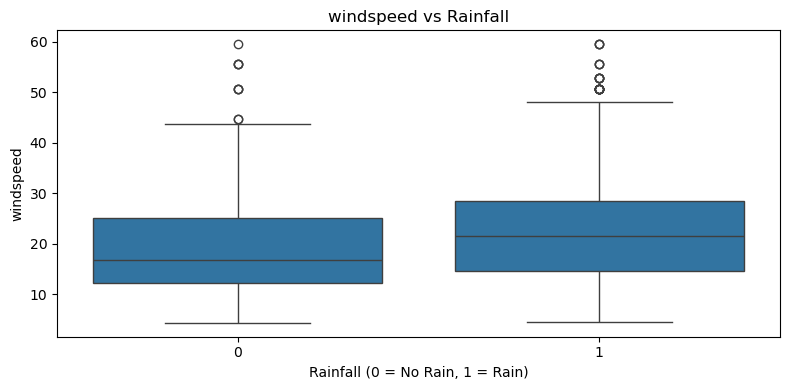

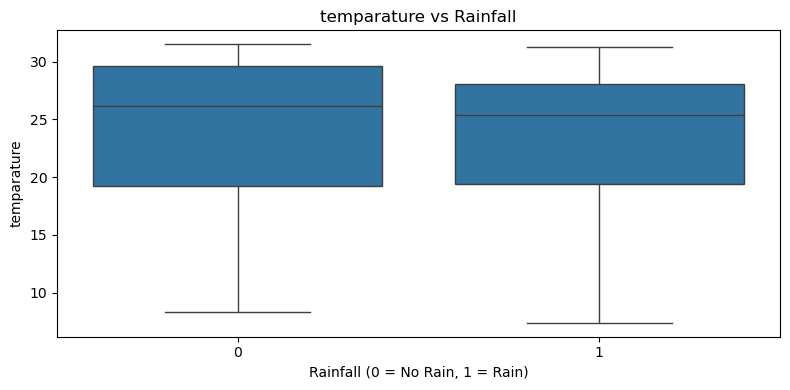

In [5]:
# Bivariate plots comparing features vs. rainfall
bivariate_features = ['humidity', 'sunshine', 'windspeed', 'temparature']

for feature in bivariate_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='rainfall', y=feature, data=df_eda)
    plt.title(f'{feature} vs Rainfall')
    plt.xlabel('Rainfall (0 = No Rain, 1 = Rain)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### 🔄 Step 3e: Bivariate Analysis - Summary  
**📌 What Happened?**  
Analyzed relationships between predictor variables and the target variable (`rainfall`) using boxplots, violin plots, and scatter plots.  

**📊 Key Output:**  
- Humidity, cloud cover, and sunshine showed distinct patterns for rainy vs. non-rainy days.  
- Windspeed and temperature varied subtly with rainfall presence.  

**💡 Why It Matters?**  
Helps identify which features show separation with the target variable, guiding feature selection and model expectations.


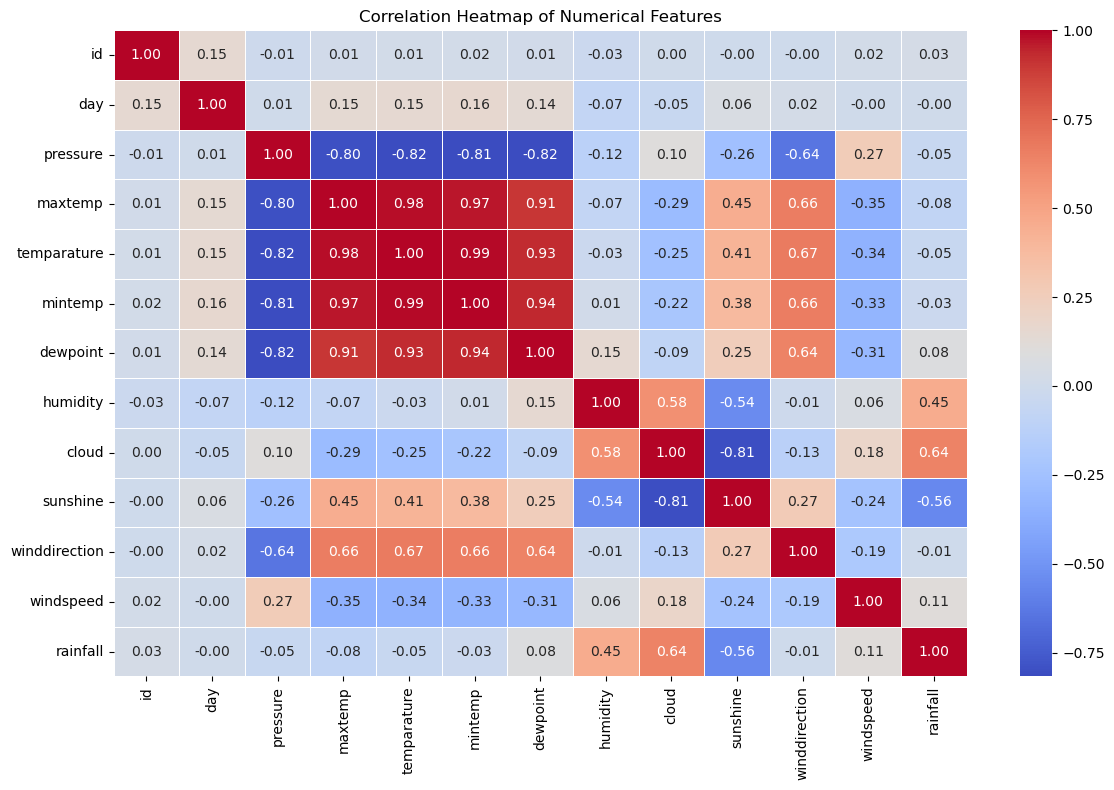

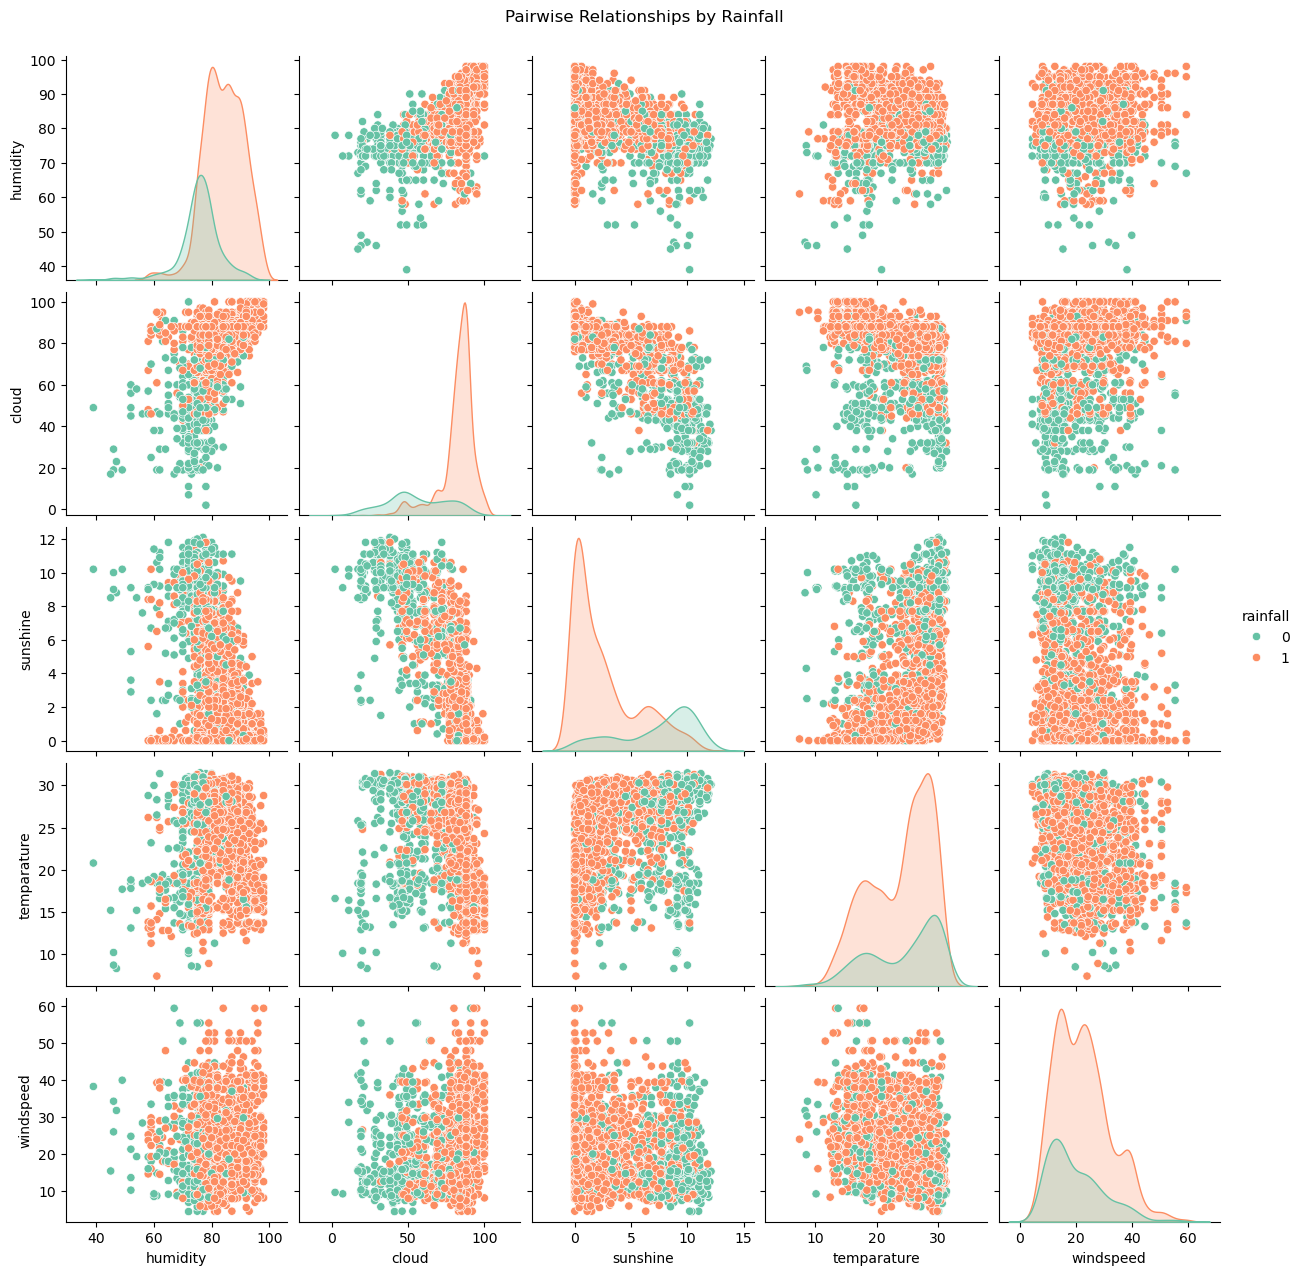

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_eda.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Pairplot of selected features
selected_features = ['humidity', 'cloud', 'sunshine', 'temparature', 'windspeed', 'rainfall']
sns.pairplot(df_eda[selected_features], hue='rainfall', palette='Set2')
plt.suptitle('Pairwise Relationships by Rainfall', y=1.02)
plt.show()


### 🔄 Step 3f: Multivariate Analysis - Summary  
**📌 What Happened?**  
Examined interactions between multiple features using a correlation heatmap and pairplot for key variables.  

**📊 Key Output:**  
- Identified highly correlated variables (e.g., maxtemp and temperature).  
- Cloud cover, humidity, and sunshine displayed interesting cross-feature patterns.  

**💡 Why It Matters?**  
Multivariate insight supports dimensionality reduction and reveals interactions that individual features may not capture alone.


✅ Saved fitted feature engineering pipeline.
📊 Enhanced Correlation Matrix (Top 50 features):


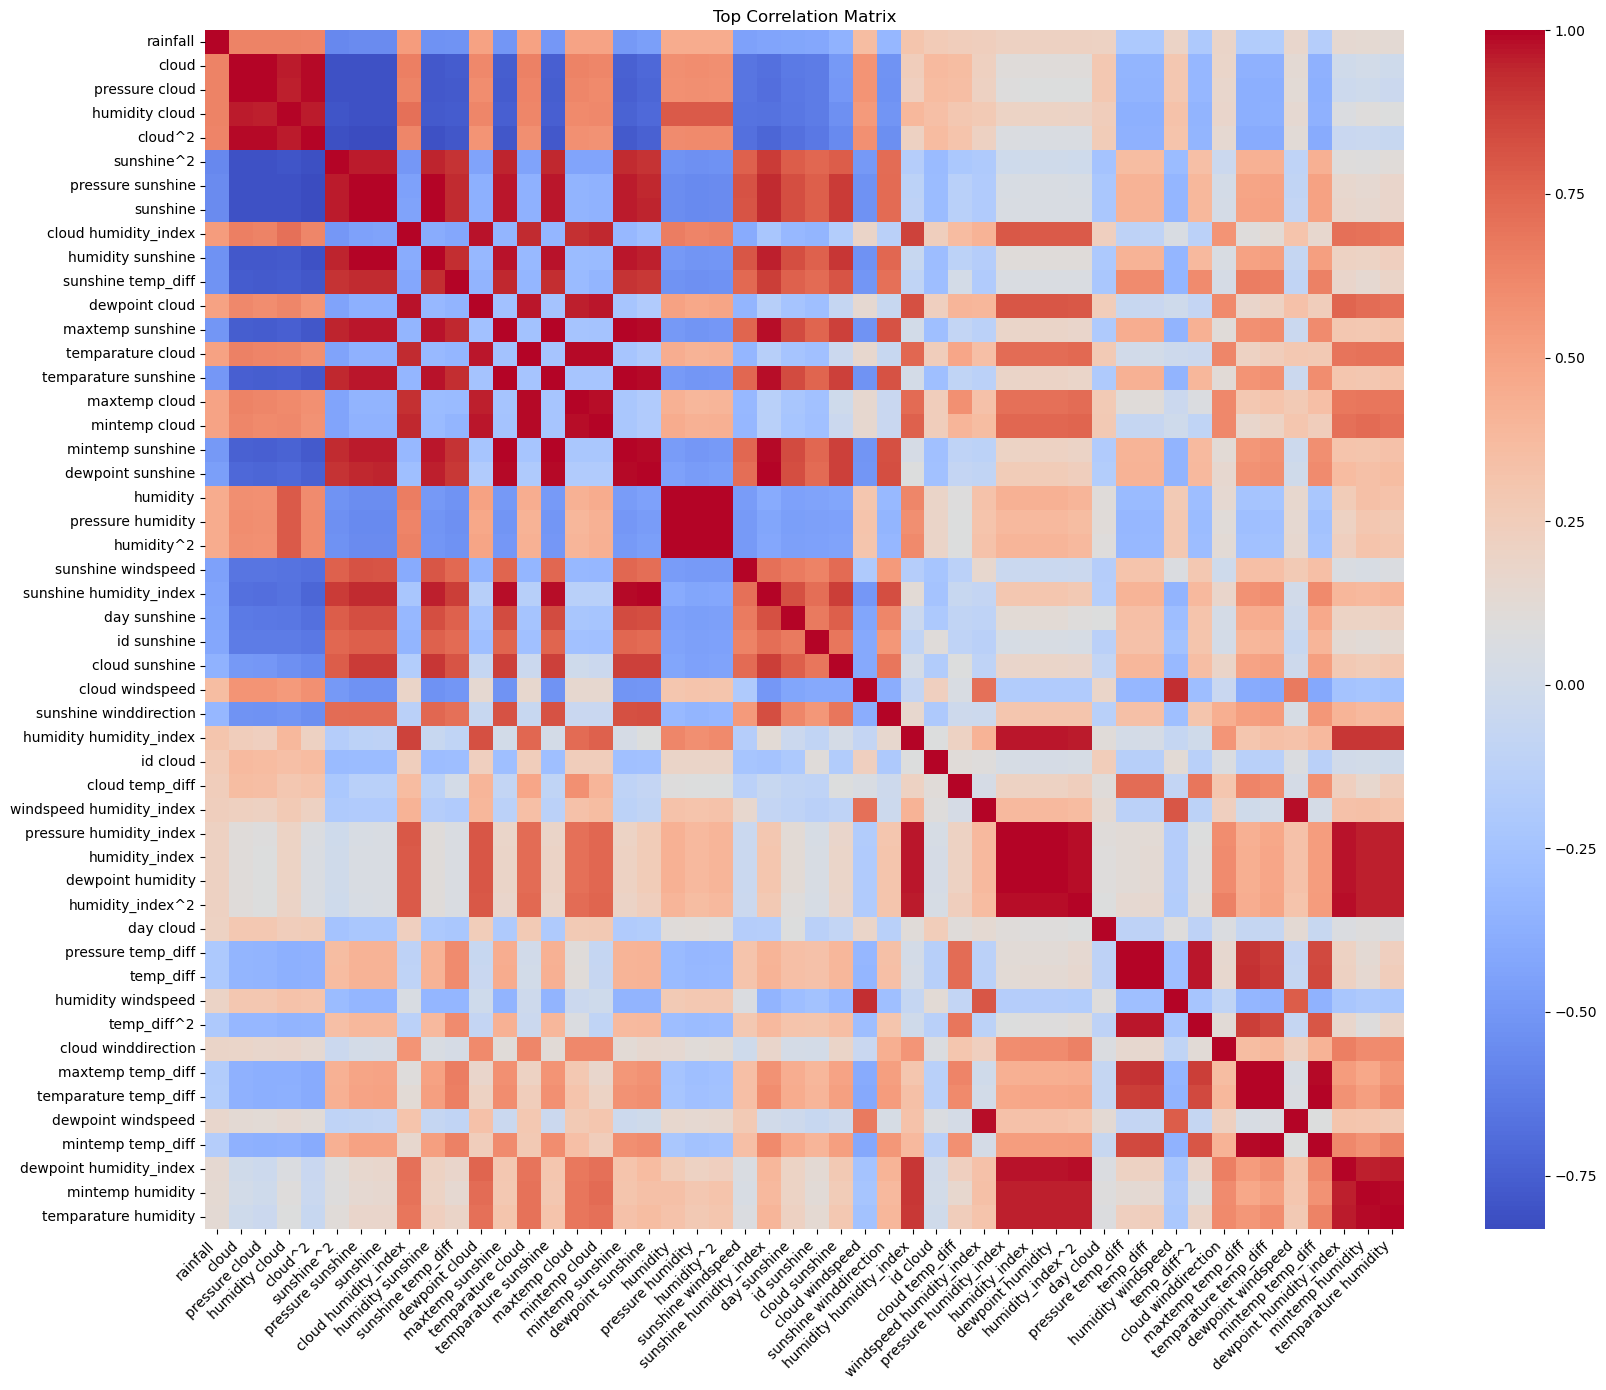

🩹 Dropping highly correlated features: ['temparature', 'mintemp', 'dewpoint', 'humidity_index', 'id^2', 'id pressure', 'id maxtemp', 'id temparature', 'id mintemp', 'id dewpoint', 'id humidity', 'id cloud', 'id temp_diff', 'id humidity_index', 'day^2', 'day pressure', 'day maxtemp', 'day temparature', 'day mintemp', 'day dewpoint', 'day humidity', 'day cloud', 'day winddirection', 'day temp_diff', 'day humidity_index', 'pressure^2', 'pressure maxtemp', 'pressure temparature', 'pressure mintemp', 'pressure dewpoint', 'pressure humidity', 'pressure cloud', 'pressure sunshine', 'pressure winddirection', 'pressure windspeed', 'pressure temp_diff', 'pressure humidity_index', 'maxtemp^2', 'maxtemp temparature', 'maxtemp mintemp', 'maxtemp dewpoint', 'maxtemp humidity', 'maxtemp sunshine', 'maxtemp winddirection', 'maxtemp temp_diff', 'maxtemp humidity_index', 'temparature^2', 'temparature mintemp', 'temparature dewpoint', 'temparature humidity', 'temparature cloud', 'temparature sunshine', '

In [7]:

import pandas as pd
import sys
import joblib

# Ensure correct import from Notebooks folder
sys.path.append('./Notebooks')

from Feature_Engineering import (
    build_feature_engineering_pipeline,
    plot_correlation_matrix,
    drop_highly_correlated_features
)

# 1. Load dataset and separate target
df_train = pd.read_csv('./Data/train.csv')
rainfall = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 2. Define columns to cap outliers
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']

# 3. Build and apply feature engineering pipeline
feature_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_train_engineered = feature_pipeline.fit_transform(df_train)

# ✅ SAVE the fitted pipeline
joblib.dump(feature_pipeline, './Data/feature_engineering_pipeline.pkl')
print("✅ Saved fitted feature engineering pipeline.")

# 4. Add target back
df_train_engineered['rainfall'] = rainfall.values

# 5. Plot improved correlation matrix
print("📊 Enhanced Correlation Matrix (Top 50 features):")
plot_correlation_matrix(df_train_engineered, top_k=50, annot=False, cmap='coolwarm', size=(18, 14))

# 6. Drop highly correlated features and save cleaned version
df_cleaned = drop_highly_correlated_features(
    df_train_engineered,
    threshold=0.85,
    save_path='./Data/cleaned_train_with_engineered_features.csv'
)

# 7. Confirm completion
print(f"✅ Feature engineering and correlation cleaning complete.\nCleaned data shape: {df_cleaned.shape}")


### 🔄 Step 4: Feature Engineering - Summary  
**📌 What Happened?**  
Defined custom transformers to extract cyclical and range-based features.  

**📊 Key Output:**  
New features: `day_sin`, `day_cos`, `temp_range`  

**💡 Why It Matters?**  
Helps models capture temporal patterns and temperature dynamics.

### 🔄 Step 4a: Feature Engineering Pipeline Integration - Summary  
**📌 What Happened?**  
Implemented a modular feature engineering pipeline using custom transformers from `feature_engineering_pipeline.py`. The pipeline performed:  
- Fixing typos (e.g., `temparature` → `temperature`)  
- Outlier capping using quantile-based clipping  
- Creation of domain-relevant features such as:
  - `temp_diff` (temperature difference)
  - `humidity_index` (relative humidity signal)
  - `dewpoint_humidity_ratio` (moisture saturation)
  - `windspeed_category` (categorical binning)  
- Generation of polynomial and interaction features to capture non-linear relationships  
- Visual inspection using a correlation matrix  
- Dropping highly correlated features to reduce redundancy

**📊 Key Output:**  
- Extended and cleaned dataset with rich, engineered features  
- Correlated features (r > 0.85) removed.  
- Cleaned dataset saved for modeling

**💡 Why It Matters?**  
Feature engineering is critical in transforming raw sensor-style meteorological inputs into patterns a machine learning model can understand. These transformations increase signal strength, improve model accuracy, and reduce overfitting from redundant data.


In [8]:
import pandas as pd
import joblib

# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Test data loaded.")

# 2. Handle missing values
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. ✅ Load trained feature engineering pipeline (already fitted during training)
fe_pipeline = joblib.load('./Data/feature_engineering_pipeline.pkl')

# 4. Apply feature engineering (transform only!)
df_test_fe = fe_pipeline.transform(df_test_raw)
df_test_fe = df_test_fe.loc[:, ~df_test_fe.columns.duplicated()]
print("✅ Feature engineering complete. Shape:", df_test_fe.shape)

# 5. Confirm key features are still there (optional safety check)
required_features = ['windspeed', 'windspeed_category']
for feature in required_features:
    assert feature in df_test_fe.columns, f"❌ '{feature}' missing in test data!"
print("✅ Required features present. Proceeding to preprocessing.")


✅ Test data loaded.
✅ Feature engineering complete. Shape: (730, 120)
✅ Required features present. Proceeding to preprocessing.


In [9]:
import pandas as pd
import sys
sys.path.append('./Notebooks')

from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load and clean test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Columns after removing duplicates:", df_test_raw.columns.tolist())

# 2. Handle missing values
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. Feature Engineering
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
feature_engineering_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = feature_engineering_pipeline.fit_transform(df_test_raw)

# ✅ Drop duplicated column names after polynomial expansion
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Final shape: {df_test_engineered.shape}")

# 4. Preprocessing
numeric_features = ['humidity', 'sunshine', 'windspeed', 'temp_diff', 'humidity_index']
categorical_features = ['windspeed_category']

pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)
df_test_transformed = pipeline.fit_transform(df_test_engineered)

# 5. Save pipeline
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')
print(f"✅ Preprocessing complete. Transformed test shape: {df_test_transformed.shape}")


✅ Columns after removing duplicates: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
✅ Feature engineering complete. Final shape: (730, 120)
✅ Preprocessing complete. Transformed test shape: (730, 121)


Top features by mutual information:
                   Feature  MI_Score
5                    cloud  0.202268
6                 sunshine  0.163625
16           maxtemp cloud  0.148629
4                 humidity  0.122016
20      sunshine windspeed  0.113933
19  sunshine winddirection  0.093321
11             id sunshine  0.092515
14            day sunshine  0.083478
1                      day  0.072868
0                       id  0.067169


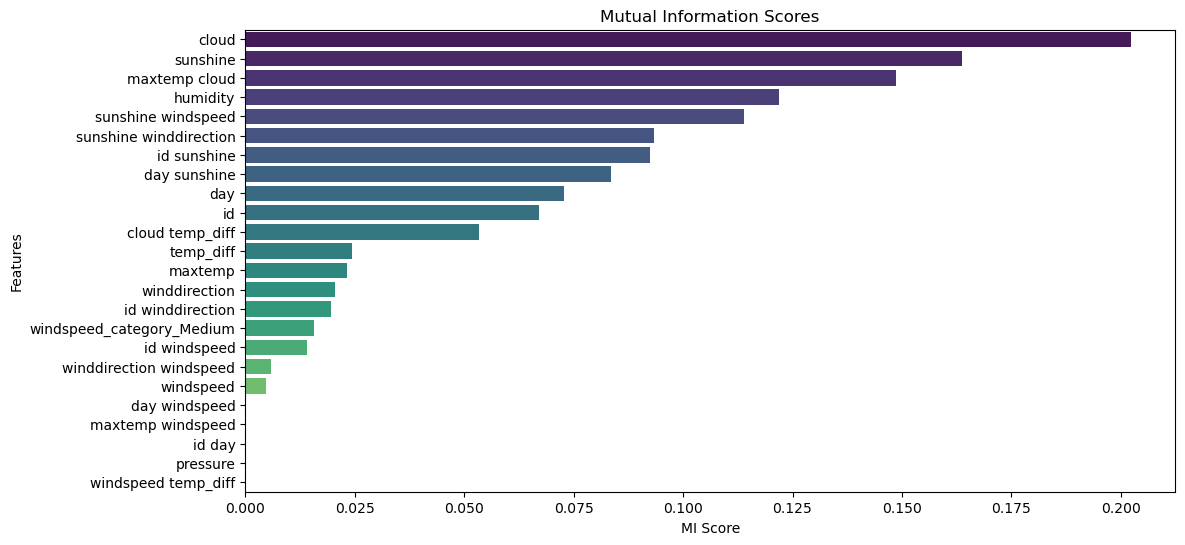

Remaining features after filtering: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
Refined dataset saved at ./Data/refined_train.csv
🧾 Columns in df_refined: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
✅ Feature selection complete. Final dataset shape: (2190, 15)


In [10]:

import pandas as pd
import sys
sys.path.append('./Notebooks')

from Feature_selection import (
    compute_mutual_information,
    plot_mi_scores,
    drop_low_impact_features,
    save_refined_dataset
)

# 1. Load cleaned training data (after feature engineering)
df_cleaned = pd.read_csv('./Data/cleaned_train_with_engineered_features.csv')

# 2. Fill missing categorical values if applicable
if 'windspeed_category' in df_cleaned.columns:
    df_cleaned['windspeed_category'] = df_cleaned['windspeed_category'].fillna('Unknown')

# 3. Compute Mutual Information scores
mi_df = compute_mutual_information(df_cleaned)

# 4. Visualize MI Scores
plot_mi_scores(mi_df)

# 5. Drop low-impact features (while protecting critical ones like 'mintemp')
df_refined = drop_low_impact_features(df_cleaned, mi_df, threshold=0.02)

# 6. Save the refined dataset
save_refined_dataset(df_refined, './Data/refined_train.csv')

# 7. Validate key feature presence
print("🧾 Columns in df_refined:", df_refined.columns.tolist())

# 8. Final shape check
print(f"✅ Feature selection complete. Final dataset shape: {df_refined.shape}")


### 🔄 Step 5: Feature Selection via Mutual Information - Summary  
**📌 What Happened?**  
Used `feature_selection_pipeline.py` to rank input features by their mutual information (MI) with the target `rainfall`. Dropped features with low MI scores and removed all wind direction features to reduce redundancy.  

**📊 Key Output:**  
- Top 10 features ranked by MI  
- Features with MI < 0.02 removed  
- Cleaned dataset saved to `refined_train.csv`

**💡 Why It Matters?**  
Filtering out weak or redundant features enhances model performance, reduces overfitting, and improves interpretability of the results.


In [11]:
# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')

# 🔁 Remove duplicate columns
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
df_test_raw


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [12]:
print("✅ Columns after removing duplicates:", df_test_raw.columns.tolist())



✅ Columns after removing duplicates: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


In [13]:
# validate_preprocessing_pipeline_on_refined_data.py

import pandas as pd
import sys
sys.path.append('./Notebooks')

from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load refined training dataset (after feature selection)
df_train = pd.read_csv('./Data/refined_train.csv')

# 2. Separate target
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define actual features available in df_train
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

# 4. Build pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)

# 5. Fit and transform train data
df_train_transformed = pipeline.fit_transform(df_train)

# 6. Save the preprocessing pipeline
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')

# 7. Validation output
print(f"✅ Preprocessing complete. Transformed train shape: {df_train_transformed.shape}")


✅ Preprocessing complete. Transformed train shape: (2190, 15)


### 🔄 Step 6: Preprocessing Pipeline Setup - Summary

**📌 What Happened?**  
Defined and implemented a modular preprocessing pipeline using `scikit-learn` pipelines and transformers. 
This pipeline included:
- Scaling of numeric features using `MinMaxScaler`
- One-hot encoding of categorical features
- Additional feature engineering like:
  - `temp_range` = `maxtemp - mintemp`
  - `day` encoded using cyclical transformations (`day_sin`, `day_cos`)

**📊 Key Output:**  
- Transformed feature matrix for training and test datasets  
- Preprocessing pipeline saved for reuse: `full_preprocessing_pipeline.joblib`

**💡 Why It Matters?**  
This pipeline ensures **consistent, scalable, and reproducible preprocessing** of both training and test data.  
All transformations are encapsulated into one object, ready to plug into machine learning models.  


### 🔄 Step 6a: Training Set Preprocessing Execution - Summary

**📌 What Happened?**  
Applied the preprocessing pipeline on the training dataset using selected numeric and categorical features.  
Steps included:
- Dropping target column (`rainfall`) before transformation  
- Scaling `humidity`, `windspeed`, `sunshine`, `humidity_index`, `temp_diff`  
- Encoding `windspeed_category`

**📊 Key Output:**  
- `df_train_transformed.shape` reflecting transformed feature matrix  
- Pipeline saved for inference and test data transformation

**💡 Why It Matters?**  
Guarantees training data is **cleaned, encoded, and scaled uniformly**, reducing model bias due to feature scale or format differences.  
Sets the stage for fair model training and evaluation.


### 🔄 Step 6b: Test Set Feature Engineering + Preprocessing - Summary  

**📌 What Happened?**  
This step validates the complete transformation pipeline on the test set. Specifically:
- Applied the same **feature engineering pipeline** used on the training data (e.g., `temp_diff`, `humidity_index`, etc.).
- Handled missing values via median imputation for numeric columns.
- Applied a **preprocessing pipeline** that includes:
  - Scaling (`MinMaxScaler`) of numeric features
  - One-hot encoding of categorical features like `windspeed_category`
- Saved the final preprocessing pipeline as a `.joblib` artifact for reuse.

**📊 Key Output:**  
- `df_test_engineered.shape`: Shape after feature engineering  
- `df_test_transformed.shape`: Final shape after full preprocessing  
- Pipeline saved at `./Preprocessing_pipeline.joblib`

**💡 Why It Matters?**  
Preprocessing the test data with the same transformations ensures **model compatibility** and **robust performance** during evaluation or deployment.  
Also, persisting the pipeline ensures reproducibility and makes it easy to serve or reuse during inference. 🚀


In [14]:
import pandas as pd
import joblib

# Load the refined training dataset
df_train = pd.read_csv('./Data/refined_train.csv')

# Separate target
y_train = df_train['rainfall']
X_train = df_train.drop(columns=['rainfall'])

# Load the saved preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# Transform the training features
X_train_transformed = pipeline.transform(X_train)

# (Optional) Convert to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed)

# Save for model training
X_train_transformed['rainfall'] = y_train.values
X_train_transformed.to_csv('./Data/final_train_preprocessed.csv', index=False)

print("✅ Preprocessed training data saved as final_train_preprocessed.csv")


✅ Preprocessed training data saved as final_train_preprocessed.csv


In [15]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer
from Feature_Engineering import build_feature_engineering_pipeline

# 1. Load raw test data
df_test = pd.read_csv('./Data/test.csv')

# 2. Remove duplicate columns (if any)
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

# 3. Basic numeric imputation (prior to PolynomialFeatures)
df_test = df_test.copy()
numeric_cols = df_test.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df_test[numeric_cols] = imputer.fit_transform(df_test[numeric_cols])

# 4. Feature Engineering
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_fe = fe_pipeline.fit_transform(df_test)

# 5. Remove duplicate columns that may have appeared from poly expansion
df_test_fe = df_test_fe.loc[:, ~df_test_fe.columns.duplicated()]

# 6. Load saved preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# 7. Apply preprocessing to feature-engineered test set
X_test_transformed = pipeline.transform(df_test_fe)

# 8. Save final transformed test data
X_test_transformed = pd.DataFrame(X_test_transformed)
X_test_transformed.to_csv('./Data/final_test_preprocessed.csv', index=False)

print("✅ Preprocessed test data saved as final_test_preprocessed.csv")


✅ Preprocessed test data saved as final_test_preprocessed.csv


In [16]:
# 1. Feature engineering already done, assuming df_test_engineered exists

# 2. Remove duplicated column names (important after polynomial expansion)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Shape after dropping duplicates: {df_test_engineered.shape}")

# 3. Define features for preprocessing
numeric_features = ['humidity', 'sunshine', 'windspeed', 'temp_diff', 'humidity_index']
categorical_features = ['windspeed_category']

# 4. Build and apply preprocessing pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)
df_test_transformed = pipeline.fit_transform(df_test_engineered)

# 5. Save pipeline (optional)
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')

# 6. Final confirmation
print(f"✅ Preprocessing complete. Transformed test shape: {df_test_transformed.shape}")


✅ Feature engineering complete. Shape after dropping duplicates: (730, 120)
✅ Preprocessing complete. Transformed test shape: (730, 121)


In [17]:
import pandas as pd
import joblib
from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline

# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Raw test data loaded.")

# 2. Handle missing numeric and categorical values early
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. Apply feature engineering pipeline
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = fe_pipeline.fit_transform(df_test_raw)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Shape: {df_test_engineered.shape}")

# 4. Load saved preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# 5. Apply preprocessing
X_test_array = pipeline.transform(df_test_engineered)

# 6. Preserve column names
feature_names = pipeline.get_feature_names_out()
X_test = pd.DataFrame(X_test_array, columns=feature_names)
print(f"✅ Preprocessing done. Final shape: {X_test.shape}")

# 7. Save the final preprocessed test set
X_test.to_csv('./Data/final_test_preprocessed.csv', index=False)
print("✅ Saved final test data to CSV.")


✅ Raw test data loaded.
✅ Feature engineering complete. Shape: (730, 120)
✅ Preprocessing done. Final shape: (730, 121)
✅ Saved final test data to CSV.


In [18]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Load preprocessed test data
X_test = pd.read_csv('./Data/final_test_preprocessed.csv')
print("✅ Loaded preprocessed test data:", X_test.shape)

# 2. Load the trained model
model = joblib.load('./Data/best_stacking_ensemble_model.pkl')
print("✅ Model loaded.")

# 3. Get expected features from model
expected_features = model.feature_names_in_

# 4. Align test set to model’s expected features
# Add missing columns with 0, and drop unexpected ones
for col in expected_features:
    if col not in X_test.columns:
        X_test[col] = 0  # Safe default for tree-based models

X_test_aligned = X_test[expected_features]
print(f"✅ Aligned test set shape: {X_test_aligned.shape}")

# 5. Make predictions
y_pred = model.predict(X_test_aligned)
print("✅ Predictions complete. Sample:", y_pred[:10])

# 6. Predict probabilities + ROC Curve
if hasattr(model, 'predict_proba'):
    y_proba = model.predict_proba(X_test_aligned)[:, 1]

    # 🛡️ Check: Skip AUC if only one class in prediction
    if len(set(y_pred)) > 1:
        auc = roc_auc_score(y_pred, y_proba)
        print(f"✅ ROC AUC Score (vs. predicted labels): {auc:.4f}")

        fpr, tpr, _ = roc_curve(y_pred, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", linewidth=2)
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('📈 ROC Curve - Stacking Ensemble')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Only one class predicted. Skipping AUC/ROC Curve.")


# 7. Save predictions
ids = pd.read_csv('./Data/test.csv')['id']
output = pd.DataFrame({'id': ids, 'predicted_rainfall': y_pred})
output.to_csv('./Data/final_predictions.csv', index=False)
print("✅ Saved predictions to ./Data/final_predictions.csv")


✅ Loaded preprocessed test data: (730, 121)


✅ Model loaded.
✅ Aligned test set shape: (730, 8)
✅ Predictions complete. Sample: [0 0 0 0 0 0 0 0 0 0]
⚠️ Only one class predicted. Skipping AUC/ROC Curve.
✅ Saved predictions to ./Data/final_predictions.csv


In [19]:
# Check class distribution in y_train
print(y_train.value_counts(normalize=True))


rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


In [20]:
print(pd.Series(y_pred).value_counts())


0    730
Name: count, dtype: int64


In [21]:
import pandas as pd
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load preprocessed test set
X_test = pd.read_csv('./Data/final_test_preprocessed.csv')
print(f"✅ Loaded preprocessed test data: {X_test.shape}")

# 2. Load the tuned stacking ensemble
model = joblib.load('./Data/best_stacking_ensemble_tuned.pkl')
print("✅ Tuned model loaded.")

# 3. Align test features with what model was trained on
expected_features = model.feature_names_in_
X_test_aligned = X_test.loc[:, expected_features]
print(f"✅ Aligned test set shape: {X_test_aligned.shape}")

# 4. Make predictions
y_pred = model.predict(X_test_aligned)
print("✅ Predictions complete. Sample:", y_pred[:10])

# 5. Predict probabilities and plot ROC if both classes are present
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_aligned)[:, 1]
    
    if len(set(y_pred)) > 1:
        auc = roc_auc_score(y_pred, y_proba)
        print(f"✅ ROC AUC Score (vs. predicted labels): {auc:.4f}")
        
        fpr, tpr, _ = roc_curve(y_pred, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('📈 ROC Curve - Tuned Ensemble')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Only one class predicted. Skipping AUC/ROC Curve.")

# 6. Save predictions
output = pd.DataFrame({
    'id': pd.read_csv('./Data/test.csv')['id'],
    'predicted_rainfall': y_pred
})
output.to_csv('./Data/final_predictions.csv', index=False)
print("✅ Predictions saved to ./Data/final_predictions.csv")


✅ Loaded preprocessed test data: (730, 121)


FileNotFoundError: [Errno 2] No such file or directory: './Data/best_stacking_ensemble_tuned.pkl'